In [6]:
#Problem1
#1
import pandas as pd
import numpy as np
dataframe = pd.read_csv("/content/drive/MyDrive/Worksheet4/diabetes_.csv")
print(dataframe.shape)
print(dataframe.head())
print(dataframe.columns)
print(dataframe.dtypes)
print(dataframe.describe())
print(dataframe.isnull().sum())#no null values


(768, 9)
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness            

In [7]:
#2
missing_info = dataframe.isnull().sum() / len(dataframe) * 100
for col in dataframe.columns:
  if missing_info[col]>10:
    dataframe[col].fillna(dataframe[col].median())
  else:
    dataframe.dropna(subset=[col],inplace=True)
print("Data after processing:n", dataframe.head())

Data after processing:n    Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [8]:
#3
X = dataframe.drop(columns=["Outcome"]).values
y= dataframe["Outcome"].values

def train_test_split(X, y, test_size=0.3, random_seed=42):
 np.random.seed(random_seed)
 indices = np.arange(X.shape[0])
 np.random.shuffle(indices)
 test_split_size = int(len(X) * test_size)
 test_indices = indices[:test_split_size]
 train_indices = indices[test_split_size:]
 X_train, X_test = X[train_indices], X[test_indices]
 y_train, y_test = y[train_indices], y[test_indices]
 return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (538, 8)
Shape of X_test: (230, 8)
Shape of y_train: (538,)
Shape of y_test: (230,)


In [9]:
#4
def euclidean_distance(point1, point2):
  if point1.shape != point2.shape:
    raise ValueError("Points must have same dimensions to calculate Euclidean distance")
  distance = np.sqrt(np.sum(point1 - point2) ** 2)
  return distance

In [10]:
def knn_predict_single(query, X_train, y_train, k=3):
  distances = [euclidean_distance(query, x) for x in X_train]
  sorted_indices = np.argsort(distances)[:k]
  nearest_indices=sorted_indices[:k]
  nearest_labels = y_train[nearest_indices]
  prediction = np.bincount(nearest_labels).argmax()
  return prediction

In [11]:
def knn_predict(X_test, X_train, y_train, k=3):
  predictions = [knn_predict_single(x, X_train, y_train, k) for x in X_test]
  return np.array(predictions)

In [12]:
def compute_accuracy(y_true, y_pred):
  correct_predictions = np.sum(y_true == y_pred)
  total_predictions = len(y_true)
  accuracy = (correct_predictions / total_predictions) * 100
  return accuracy

In [13]:
predictions = knn_predict(X_test, X_train, y_train, k=3)
print("Predictions:", predictions)
unscaled_accuracy = compute_accuracy(y_test, predictions)
print("Accuracy:", unscaled_accuracy)

Predictions: [0 0 0 0 1 1 0 1 0 1 0 1 1 1 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0
 1 1 0 0 1 1 1 0 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 1 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 1 0 0 1 0 0 0 1 0 0 0
 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0
 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1
 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0 0 1 0 0 1 1 0 0 0 0 0
 0 0 0 0 0 0 0 0]
Accuracy: 61.73913043478261


In [14]:
#Problem -2
#1
def min_max_scaling(X):
  min_values = np.min(X, axis=0)
  max_values = np.max(X, axis=0)
  X_scaled = (X - min_values) / (max_values - min_values)
  return X_scaled
X_scaled = min_max_scaling(X)
Xscaled_train, Xscaled_test, y_train, y_test = train_test_split(X_scaled,y,test_size=0.3)


In [15]:
#2
scaled_predictions = knn_predict(Xscaled_test, Xscaled_train, y_train, k=3)
print("Predictions:", predictions)
scaled_accuracy = compute_accuracy(y_test, predictions)
print("Accuracy:", unscaled_accuracy)

Predictions: [0 0 0 0 1 1 0 1 0 1 0 1 1 1 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0
 1 1 0 0 1 1 1 0 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 1 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 1 0 0 1 0 0 0 1 0 0 0
 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0
 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1
 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0 0 1 0 0 1 1 0 0 0 0 0
 0 0 0 0 0 0 0 0]
Accuracy: 61.73913043478261


In [16]:
#Problem -3
#1
import matplotlib.pyplot as plt
import time
def experiment_knn_k_values(X_train, y_train, X_test, y_test, k_values):
  accuracies = {}
  times={}
  for k in k_values:
    start_time = time.time()
    predictions = knn_predict(X_test, X_train, y_train, k=k)
    accuracy = compute_accuracy(y_test, predictions)
    end_time = time.time()
    execution_time = end_time - start_time
    accuracies[k] = accuracy
    times[k]=execution_time
    print(f"Accuracy for k={k} is {accuracy:.2f}%")
  return accuracies, times
k_values = range(1,16)
print("For unscaled data")
accuracy_unscaled, time_unscaled= experiment_knn_k_values(X_train, y_train, X_test, y_test, k_values)
print("For scaled data")
accuracy_scaled, time_scaled= experiment_knn_k_values(Xscaled_train, y_train, Xscaled_test, y_test, k_values)


For unscaled data
Accuracy for k=1 is 60.00%
Accuracy for k=2 is 63.91%
Accuracy for k=3 is 61.74%
Accuracy for k=4 is 66.96%
Accuracy for k=5 is 64.35%
Accuracy for k=6 is 64.35%
Accuracy for k=7 is 65.65%
Accuracy for k=8 is 66.52%
Accuracy for k=9 is 67.39%
Accuracy for k=10 is 67.83%
Accuracy for k=11 is 66.96%
Accuracy for k=12 is 66.52%
Accuracy for k=13 is 68.26%
Accuracy for k=14 is 66.09%
Accuracy for k=15 is 66.96%
For scaled data
Accuracy for k=1 is 61.74%
Accuracy for k=2 is 66.96%
Accuracy for k=3 is 66.96%
Accuracy for k=4 is 68.26%
Accuracy for k=5 is 70.87%
Accuracy for k=6 is 71.30%
Accuracy for k=7 is 70.00%
Accuracy for k=8 is 71.74%
Accuracy for k=9 is 72.17%
Accuracy for k=10 is 72.17%
Accuracy for k=11 is 71.30%
Accuracy for k=12 is 71.74%
Accuracy for k=13 is 71.74%
Accuracy for k=14 is 72.61%
Accuracy for k=15 is 73.04%


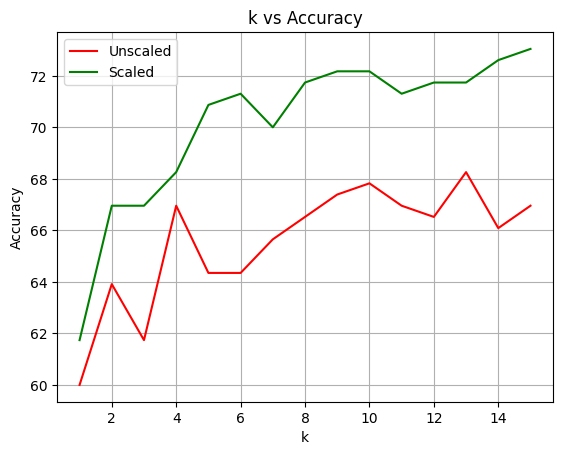

In [20]:
#2
plt.figure()
plt.plot(k_values, accuracy_unscaled.values(), label="Unscaled", color="red")
plt.plot(k_values, accuracy_scaled.values(), label="Scaled", color="green")
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.title("k vs Accuracy")
plt.legend()
plt.grid()
plt.show()



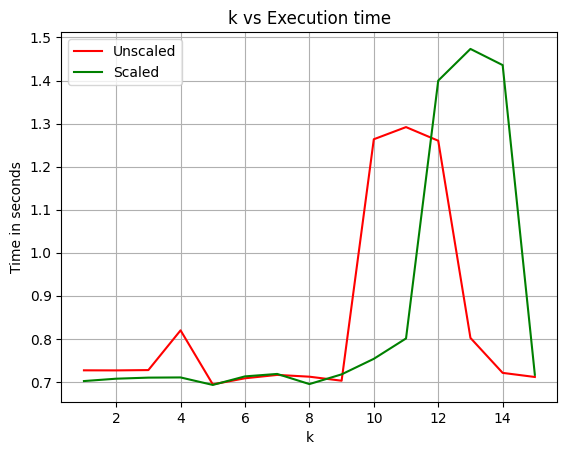

In [21]:
plt.figure()
plt.plot(k_values, time_unscaled.values(), label="Unscaled", color="red")
plt.plot(k_values, time_scaled.values(),  label="Scaled", color="green")
plt.xlabel("k")
plt.ylabel("Time in seconds")
plt.title("k vs Execution time")
plt.legend()
plt.grid()
plt.show()


3. Analyze and Discuss


K affects the accuracy and computational cost in two ways:
First, when the value of k is small, the model closely follows the training data resulting in low bias and can capture local patterns well. But having smaller value of k also results in high variance where the model is quite sensitive to noise and outliers. Hence, the result is high training accuracy with lower test accuracy which increases the chances of overfitting.

Second, when the value of k is large, the model has more stable predictions and less affected by the noise resulting in lower variance. But having large value of k also results in high bias as it ignores small but important details which causes the model to smooth the decision boundry too much. Hence, the result is lower training accuracy and lower test accuracy as well if the value of k is too large which increases the chances of underfitting.

According to my analysis, the optimal value of k is the one with maximum accuracy which gives balanced variance, bias and reasonable computational cost.

4. Additional questions

KNN stores all the training data which requires high memory. Likewise, for every prediction, distance must be calculated with every data point which results in high computation time and slower predictions.

As for high-dimensional data, data points become very spread out with huge space between them. So, the distances between nearest and farest points become almost the same which causes the model to not be able to point out the actual nearest point.

Few strategies to improve the efficiency of KNN are approximate nearest neighbors and dimensionality reduction. Approximate nearest neighbors means to find the nearest neighbors which greatly reduces computation time with minimal accuracy loss. To achieve this we can use KD-tree, Ball tree, etc.
Dimensionality reduction means reduction of the number of features before applying KNN which makes distance calculations more meaningful.